# 🧪 Notebook 6 — Model Deployment & Inference

**Objective:**  

Prepare the final, tuned model for deployment. This notebook will:
 
- Load the best model(s) from Notebook 5.  
  
- Build preprocessing + prediction pipeline.  
  
- Create functions for inference on new data.  
  
- Test predictions with sample inputs.  
  
- Visualize feature importance for interpretability.  
  
- Save the pipeline for deployment.
 
 
This ensures that new data can be fed into the model consistently and predictions are reproducible.

---


## 6.1 Load Tuned Model & Scaler  

**Purpose**  

Retrieve trained pipelines that include preprocessing and model steps.  

**Approach**  

- Load saved `.pkl` files using `joblib`.  
  
- Ensure both Logistic Regression and Random Forest are available.  

**Expected Outcome**  

Best-performing tuned pipelines are loaded and ready for inference. 

In [3]:
import joblib
import pandas as pd

# Load best pipelines
pipeline_log_reg = joblib.load("models/tuned/best_log_reg_pipeline.pkl")
pipeline_rf      = joblib.load("models/tuned/best_rf_pipeline.pkl")

print("✅ Best model pipelines loaded successfully")

✅ Best model pipelines loaded successfully


---

## 6.2 Build Inference Pipeline  

**Purpose**  

Enable predictions on new raw patient data.  

**Approach**  

- Define a function that takes a trained pipeline and raw input.  
  
- Return both predicted class and probability.  

**Expected Outcome**  

Reusable function for inference with any saved model pipeline. 

In [4]:
import pandas as pd

def predict_pipeline(model_pipeline, new_data: pd.DataFrame):
    """
    Run inference using a preprocessing + model pipeline.
    
    Args:
        model_pipeline: Trained pipeline (preprocessor + model).
        new_data (pd.DataFrame): New patient data in raw form.
        
    Returns:
        pred_class: Predicted class (0 = No Heart Disease, 1 = Heart Disease)
        pred_proba: Probability of heart disease (0.0 - 1.0)
    """
    pred_class = model_pipeline.predict(new_data)
    pred_proba = model_pipeline.predict_proba(new_data)[:, 1]
    return pred_class, pred_proba

---

## 6.3 Test Predictions with Sample Data  

**Purpose** 

Validate that pipelines work correctly on new inputs.  

**Approach**  

- Provide a test patient record in the same format as training features.
    
- Run predictions for Logistic Regression and Random Forest.  

**Expected Outcome**  

Successful predictions with both class labels and probabilities.  


In [6]:
# Example sample input (replace with realistic values)
sample_data = pd.DataFrame({
    "age": [55],
    "sex": [1],
    "cp": [3],
    "trestbps": [140],
    "chol": [220],
    "fbs": [0],
    "restecg": [1],
    "thalch": [150],
    "exang": [0],
    "oldpeak": [1.5],
})

# Logistic Regression
pred_class_lr, pred_proba_lr = predict_pipeline(pipeline_log_reg, sample_data)
print("🔹 Logistic Regression")
print("Prediction:", pred_class_lr[0])
print("Probability:", round(pred_proba_lr[0], 3))

# Random Forest
pred_class_rf, pred_proba_rf = predict_pipeline(pipeline_rf, sample_data)
print("\n🔹 Random Forest")
print("Prediction:", pred_class_rf[0])
print("Probability:", round(pred_proba_rf[0], 3))

🔹 Logistic Regression
Prediction: 1
Probability: 0.574

🔹 Random Forest
Prediction: 1
Probability: 0.677


---

## 6.4 Optional: Visualize Feature Importance  

**Purpose**  

Interpret which features drive predictions in each model.  

**Approach**  

- Extract coefficients for Logistic Regression.  
  
- Extract feature importances for Random Forest.  
  
- Visualize both with bar plots.  

**Expected Outcome**  

Visual explanation of model decision-making, aiding interpretability. 

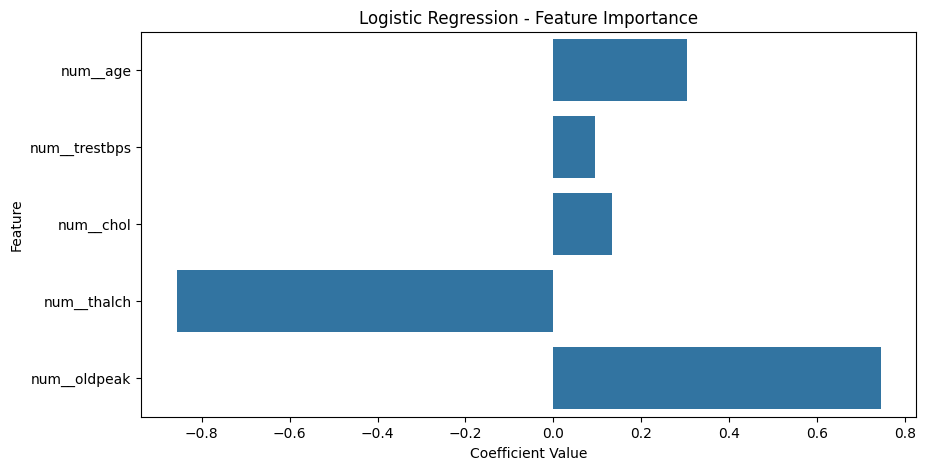

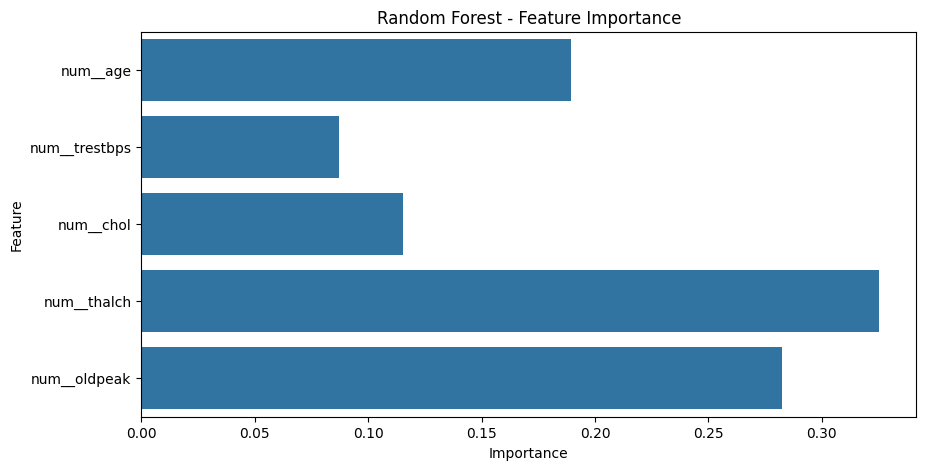

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature names from preprocessing
feature_names = pipeline_log_reg.named_steps["preprocessor"].get_feature_names_out()

# --- Logistic Regression Coefficients ---
# Find the model step name dynamically (last step in pipeline)
lr_model = list(pipeline_log_reg.named_steps.values())[-1]
coeffs = lr_model.coef_[0]

plt.figure(figsize=(10,5))
sns.barplot(x=coeffs, y=feature_names)
plt.title("Logistic Regression - Feature Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# --- Random Forest Importances ---
rf_model = list(pipeline_rf.named_steps.values())[-1]
importances = rf_model.feature_importances_

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

---

## 6.5 Save Pipelines for Deployment  

**Purpose**  

Preserve final models for use in production environments.  

**Approach**  

- Save trained pipelines (including preprocessing) with `joblib`.  
  
- Store in a dedicated `models/deployment` directory.  

**Expected Outcome**  

Deployment-ready models that can be integrated into APIs or apps.  
 

In [11]:
import os
os.makedirs("models/deployment", exist_ok=True)

joblib.dump(pipeline_log_reg, "models/deployment/final_log_reg_pipeline.pkl")
joblib.dump(pipeline_rf, "models/deployment/final_rf_pipeline.pkl")

print("✅ Final pipelines saved for deployment")

✅ Final pipelines saved for deployment
